In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

In [2]:
def Plotter(e):

  fig = plt.figure(figsize=(8,3))
  ax = fig.add_subplot(1,2,1, projection = '3d',elev = 20, azim = 270)
  ax1 = fig.add_subplot(1,2,2)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return ax,ax1

In [3]:
def f2(x,y):
  return x**4 + y**4 - 2*(x-y)**2
  #return np.sin(x)*np.cos(y)

(<Axes3D: title={'center': 'Epoch: 1'}>, <Axes: >)

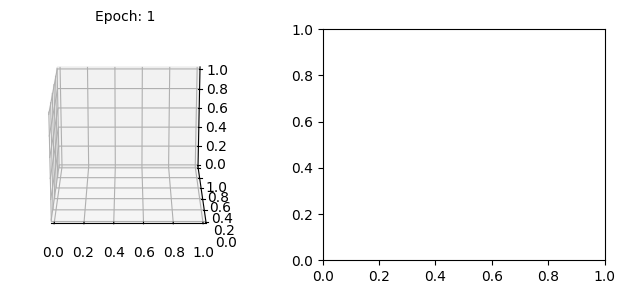

In [4]:
Plotter(1)

In [5]:
# Derivadas parciales
Dx = lambda x,y,h=1e-5: (f2(x+h,y) - f2(x-h,y))/(2*h)
Dy = lambda x,y,h=1e-5: (f2(x,y+h) - f2(x,y-h))/(2*h)

In [6]:
Gradient = lambda x,y: np.array([Dx(x,y),Dy(x,y)])
Gradient(0.5,0.5)

array([0.5, 0.5])

In [11]:
def GradientDescent(f,epochs=100,lr=0.02):

  r = np.random.uniform(-2,2,2)
  r = np.array([0.001,0.])

  x = np.linspace(-2,2,30)
  y = np.linspace(-2,2,30)
  X,Y = np.meshgrid(x,y)

  for e in range(epochs):

    r1 = r - lr*Gradient(r[0],r[1])
    r = r1

    clear_output(wait=True)

    ax,ax1 = Plotter(e)
    ax.plot_surface(X,Y,f2(X,Y),cmap='jet',alpha=0.4)
    ax.scatter(r[0],r[1],f2(r[0],r[1]),color='red')

    ax1.scatter(X,Y,s=5)
    ax1.scatter(r[0],r[1],color='r',s=20)
    ax1.arrow(r[0],r[1],Gradient(r[0],r[1])[0],Gradient(r[0],r[1])[1],color='r',head_width=0.1)

    plt.show()

    print(r)

    time.sleep(0.001)

  return r

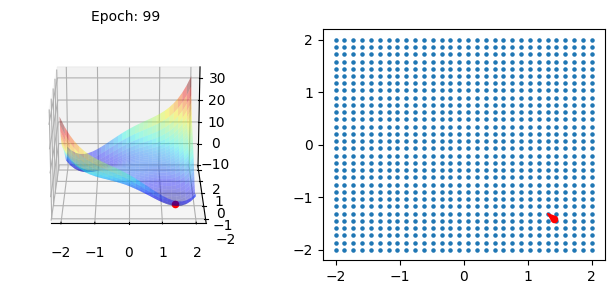

[ 1.41421355 -1.41421355]


In [12]:
r = GradientDescent(f2)